# importing libraries

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
from scipy import stats



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import joblib

# loading data set
Here we have a dataset containing 524 unique hotels. The columns are:

Index

Name - Hotel Name

Type - Type of hotel

Price - Price for 2 people

Reviews text - Total reviews count

Ratings - Ratings out of 5

date of review

In [5]:
#With all of the geographical data and the description, we can ask ourselves if one can predict the price of the hotel. We have here a regression problem.

In [6]:
df = pd.read_csv('London hotel prices.csv')
print(df)


     Unnamed: 0              Hotel Name                                Type  \
0             0  Apex London Wall Hotel                      Bunk Pod for 2   
1             1  Corinthia Hotel London                 Premium Double Room   
2             2               The Savoy                         Double Room   
3             3            Rhodes Hotel  nhow Double or Twin Room with View   
4             4               The Savoy                         Double Room   
..          ...                     ...                                 ...   
520         520           The Rembrandt                  Superior Apartment   
521         521               The Savoy                Standard Double Room   
522         522  Apex London Wall Hotel   Double Room with Private Bathroom   
523         523  Apex London Wall Hotel                  Standard Twin Room   
524         524           The Rembrandt                         Double Room   

        Price  Review Rating                       

In [7]:
df.head()

,Unnamed: 0,Hotel Name,Type,Price,Review Rating,Review text,Date of Review
0,0,Apex London Wall Hotel,Bunk Pod for 2,"? 7,887",5,Ottima qualità prezzo,10/20/2012
1,1,Corinthia Hotel London,Premium Double Room,"? 15,267",5,"By far, my best hotel in the world",3/23/2016
2,2,The Savoy,Double Room,"? 13,063",5,First visit to the American Bar at the Savoy,7/30/2013
3,3,Rhodes Hotel,nhow Double or Twin Room with View,"? 12,854",4,Nice stay,06-02-2012
4,4,The Savoy,Double Room,"? 9,471",5,Perfection,11/24/2017


In [8]:
df.tail()

,Unnamed: 0,Hotel Name,Type,Price,Review Rating,Review text,Date of Review
520,520,The Rembrandt,Superior Apartment,"? 8,899",3,Great location,08-08-2011
521,521,The Savoy,Standard Double Room,"? 10,205",5,<U+670D><U+52D9><U+4E00><U+6D41>,07-01-2018
522,522,Apex London Wall Hotel,Double Room with Private Bathroom,"? 6,123",4,Excellent!,1/30/2012
523,523,Apex London Wall Hotel,Standard Twin Room,"? 7,789",5,Beautiful hotel and excellent service,02-01-2012
524,524,The Rembrandt,Double Room,"? 6,870",4,Carino,01-01-2016


In [9]:
#We can remove the first column as it is the same as the index of the dataset

In [10]:
df = df.drop(['Unnamed: 0'], axis=1)

In [11]:
df

,Hotel Name,Type,Price,Review Rating,Review text,Date of Review
0,Apex London Wall Hotel,Bunk Pod for 2,"? 7,887",5,Ottima qualità prezzo,10/20/2012
1,Corinthia Hotel London,Premium Double Room,"? 15,267",5,"By far, my best hotel in the world",3/23/2016
2,The Savoy,Double Room,"? 13,063",5,First visit to the American Bar at the Savoy,7/30/2013
3,Rhodes Hotel,nhow Double or Twin Room with View,"? 12,854",4,Nice stay,06-02-2012
4,The Savoy,Double Room,"? 9,471",5,Perfection,11/24/2017
...,...,...,...,...,...,...
520,The Rembrandt,Superior Apartment,"? 8,899",3,Great location,08-08-2011
521,The Savoy,Standard Double Room,"? 10,205",5,<U+670D><U+52D9><U+4E00><U+6D41>,07-01-2018
522,Apex London Wall Hotel,Double Room with Private Bathroom,"? 6,123",4,Excellent!,1/30/2012
523,Apex London Wall Hotel,Standard Twin Room,"? 7,789",5,Beautiful hotel and excellent service,02-01-2012


# Data preparation And Feature Engineering

In [12]:
df.isna().sum()

Hotel Name        0
Type              0
Price             0
Review Rating     0
Review text       0
Date of Review    0
dtype: int64

In [13]:
#we don't have nan values in our data to remove

In [14]:
df = df[df['Review text'].notna() & df['Review Rating'].notna()]

In [15]:
df.groupby('Type').count()

,Hotel Name,Price,Review Rating,Review text,Date of Review
Type,,,,,
Deluxe double or Twin Room,1,1,1,1,1
1 Queen or King Bed Essential Room,1,1,1,1,1
2-person Premium Hotelroom,1,1,1,1,1
6 Person Room with Private Bathroom and Shower,1,1,1,1,1
Apartment,2,2,2,2,2
...,...,...,...,...,...
Two-Bedroom Chalet,3,3,3,3,3
Two-Bedroom House,7,7,7,7,7
Two-Bedroom Suite,1,1,1,1,1


In [16]:
data_set = df.Type.values

In [17]:
data_set = list(data_set)
data_set = ' '.join(data_set)

In [18]:
#here we'll output the ten most common words in the Type column
from collections import Counter
split_str = data_set.split()
  
Counter = Counter(split_str)

common = Counter.most_common(10)
  
print(common)

[('Room', 356), ('Double', 214), ('Twin', 102), ('with', 86), ('Standard', 79), ('Deluxe', 65), ('Apartment', 57), ('Comfort', 47), ('Bathroom', 35), ('One-Bedroom', 32)]


In [19]:
types = []
for tup in common:
    types.append(tup[0].lower())

In [20]:
print(types)

['room', 'double', 'twin', 'with', 'standard', 'deluxe', 'apartment', 'comfort', 'bathroom', 'one-bedroom']


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
pattern = "(?u)\\b[\\w-]+\\b"
cv = CountVectorizer(vocabulary=types, token_pattern=pattern)

one_hot = pd.DataFrame(cv.fit_transform(df['Type']).todense(), 
                   df.index,
                   cv.get_feature_names_out())

In [22]:
one_hot

,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
520,0,0,0,0,0,0,1,0,0,0
521,1,1,0,0,1,0,0,0,0,0
522,1,1,0,1,0,0,0,0,1,0
523,1,0,1,0,1,0,0,0,0,0


In [23]:
#we convert data types for the columns
one_hot = one_hot.apply(pd.to_numeric)
df = df.join(one_hot)
df

,Hotel Name,Type,Price,Review Rating,Review text,Date of Review,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
0,Apex London Wall Hotel,Bunk Pod for 2,"? 7,887",5,Ottima qualità prezzo,10/20/2012,0,0,0,0,0,0,0,0,0,0
1,Corinthia Hotel London,Premium Double Room,"? 15,267",5,"By far, my best hotel in the world",3/23/2016,1,1,0,0,0,0,0,0,0,0
2,The Savoy,Double Room,"? 13,063",5,First visit to the American Bar at the Savoy,7/30/2013,1,1,0,0,0,0,0,0,0,0
3,Rhodes Hotel,nhow Double or Twin Room with View,"? 12,854",4,Nice stay,06-02-2012,1,1,1,1,0,0,0,0,0,0
4,The Savoy,Double Room,"? 9,471",5,Perfection,11/24/2017,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,The Rembrandt,Superior Apartment,"? 8,899",3,Great location,08-08-2011,0,0,0,0,0,0,1,0,0,0
521,The Savoy,Standard Double Room,"? 10,205",5,<U+670D><U+52D9><U+4E00><U+6D41>,07-01-2018,1,1,0,0,1,0,0,0,0,0
522,Apex London Wall Hotel,Double Room with Private Bathroom,"? 6,123",4,Excellent!,1/30/2012,1,1,0,1,0,0,0,0,1,0
523,Apex London Wall Hotel,Standard Twin Room,"? 7,789",5,Beautiful hotel and excellent service,02-01-2012,1,0,1,0,1,0,0,0,0,0


In [24]:
df = df.drop(['Type'], axis=1)

In [25]:
#removing the currency symbol
df['Price'] = df['Price'].str.replace('₹', '')
df['Price'] = df['Price'].str.replace(',', '.')
df['Price'] = df['Price'].str.replace('?', ' ')
df['Price'] = df['Price'].astype(float)




C:\Users\91961\AppData\Local\Temp\ipykernel_21024\2276941040.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('?', ' ')


In [26]:
df[['Price', 'Review text', 'Review Rating']].describe()

,Price,Review Rating
count,525.000000,525.000000
mean,12.908368,4.521905
std,6.671401,0.868224
min,3.988000,1.000000
25%,8.736000,4.000000
50%,11.336000,5.000000
75%,14.288000,5.000000
max,53.439000,5.000000


In [27]:
q_low = df['Price'].quantile(0.01)
q_hi  = df['Price'].quantile(0.99)

df = df[(df['Price'] < q_hi) & (df['Price'] > q_low)]

In [28]:
q_low = df['Review Rating'].quantile(0.01)
q_hi  = df['Review Rating'].quantile(0.99)

df= df[(df['Review Rating'] < q_hi) & (df['Review Rating'] > q_low)]

In [29]:
df[['Price', 'Review text', 'Review Rating']].describe()

,Price,Review Rating
count,151.000000,151.000000
mean,12.712662,3.569536
std,5.779296,0.707200
min,5.704000,2.000000
25%,8.802500,3.000000
50%,10.894000,4.000000
75%,13.920000,4.000000
max,33.624000,4.000000


In [30]:
print(df.isna().sum().to_string())

Hotel Name        0
Price             0
Review Rating     0
Review text       0
Date of Review    0
room              0
double            0
twin              0
with              0
standard          0
deluxe            0
apartment         0
comfort           0
bathroom          0
one-bedroom       0


In [31]:
df

,Hotel Name,Price,Review Rating,Review text,Date of Review,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
3,Rhodes Hotel,12.854,4,Nice stay,06-02-2012,1,1,1,1,0,0,0,0,0,0
11,"Mandarin Oriental Hyde Park, London",29.391,4,"Good hotel, but needs touch-up and improved la...",2/17/2014,1,1,1,0,0,0,0,0,0,0
12,The Savoy,17.798,2,what a disappointment,06-05-2016,1,1,0,0,0,0,0,0,0,0
13,The Dorchester,11.336,4,Great hotel needs to up its game to compete today,01-04-2017,1,0,0,0,0,0,0,0,0,0
20,The Dorchester,6.794,2,The brand is bigger than the experience,10-03-2013,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,The Savoy,11.430,2,Why do pompous?,12/18/2014,1,0,1,0,0,0,0,1,0,0
516,A To Z Hotel,7.266,2,"Filthy, Unhygienic",2/16/2016,1,1,0,0,0,0,0,1,0,0
520,The Rembrandt,8.899,3,Great location,08-08-2011,0,0,0,0,0,0,1,0,0,0
522,Apex London Wall Hotel,6.123,4,Excellent!,1/30/2012,1,1,0,1,0,0,0,0,1,0


# Training

In [32]:
#Now that we have a usable dataset we can make models using popular regression algorithms

In [33]:
random_state = 0

#We prepare the test and training sets
X = df.drop(['Price'],axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Linear Regression

In [34]:
#We use a linear regression first as a baseline method

model_1 = LinearRegression()
cv = 4 #number of folds
print("R2:")
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv).mean())
print("MSE:")
print(cross_val_score(model_1, X_train.values, y_train.values, cv=cv, scoring='neg_mean_squared_error').mean())

R2:
nan
MSE:
nan


C:\Users\91961\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 4.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91961\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91961\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\91961\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\91961\anaconda3\lib\site

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=1)
print(X_train)

                            Hotel Name  Review Rating  \
93                        Rhodes Hotel              4   
422                          The Savoy              4   
323                       A To Z Hotel              3   
21   Mondrian London at Sea Containers              3   
354                      The Rembrandt              2   
..                                 ...            ...   
460                       Rhodes Hotel              3   
479                   Ridgemount Hotel              4   
263             Apex London Wall Hotel              4   
485                      The Rembrandt              3   
130                   Ridgemount Hotel              4   

                       Review text Date of Review  room  double  twin  with  \
93        Comfortable and friendly      2/23/2013     0       0     0     0   
422               My 70th birthday      4/21/2017     1       0     0     0   
323  OK hotel i forhold til prisen     06-04-2013     1       1     0     0   

In [36]:
print(y_train)

93     19.594
422     8.083
323     6.662
21     12.246
354    11.757
        ...  
460    24.411
479    11.838
263    30.616
485    14.037
130     6.384
Name: Price, Length: 143, dtype: float64


In [37]:
#correlation among the data
df.corr()

,Price,Review Rating,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
Price,1.000000,-0.075843,-0.410095,-0.261779,-0.149315,-0.049996,-0.200208,0.050749,0.090059,-0.112182,-0.162660,-0.045338
Review Rating,-0.075843,1.000000,0.009519,-0.019957,0.008010,0.101055,-0.067372,0.045765,-0.033963,-0.198627,0.026576,-0.020068
room,-0.410095,0.009519,1.000000,0.497781,0.183421,0.218260,0.051245,-0.001558,-0.489293,0.250609,0.143076,-0.289113
double,-0.261779,-0.019957,0.497781,1.000000,-0.199131,0.104253,0.098401,0.010853,-0.271873,-0.065899,0.092986,-0.160644
twin,-0.149315,0.008010,0.183421,-0.199131,1.000000,0.025806,0.068940,-0.059170,-0.174978,0.233937,0.109881,-0.103391
with,-0.049996,0.101055,0.218260,0.104253,0.025806,1.000000,-0.070479,0.105272,-0.121708,-0.025420,0.551496,-0.103391
standard,-0.200208,-0.067372,0.051245,0.098401,0.068940,-0.070479,1.000000,-0.137149,-0.142171,-0.147092,-0.043529,-0.084006
deluxe,0.050749,0.045765,-0.001558,0.010853,-0.059170,0.105272,-0.137149,1.000000,-0.042398,-0.118290,-0.093091,-0.067557
apartment,0.090059,-0.033963,-0.489293,-0.271873,-0.174978,-0.121708,-0.142171,-0.042398,1.000000,-0.122621,-0.096500,0.590879
comfort,-0.112182,-0.198627,0.250609,-0.065899,0.233937,-0.025420,-0.147092,-0.118290,-0.122621,1.000000,-0.099840,-0.072454


<AxesSubplot:>

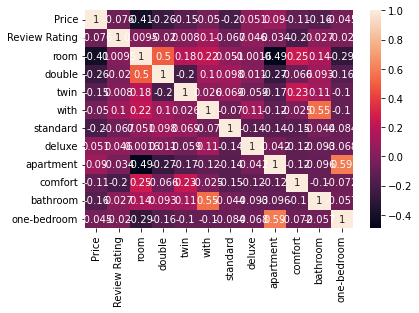

In [38]:
sns.heatmap(df.corr(),annot=True)

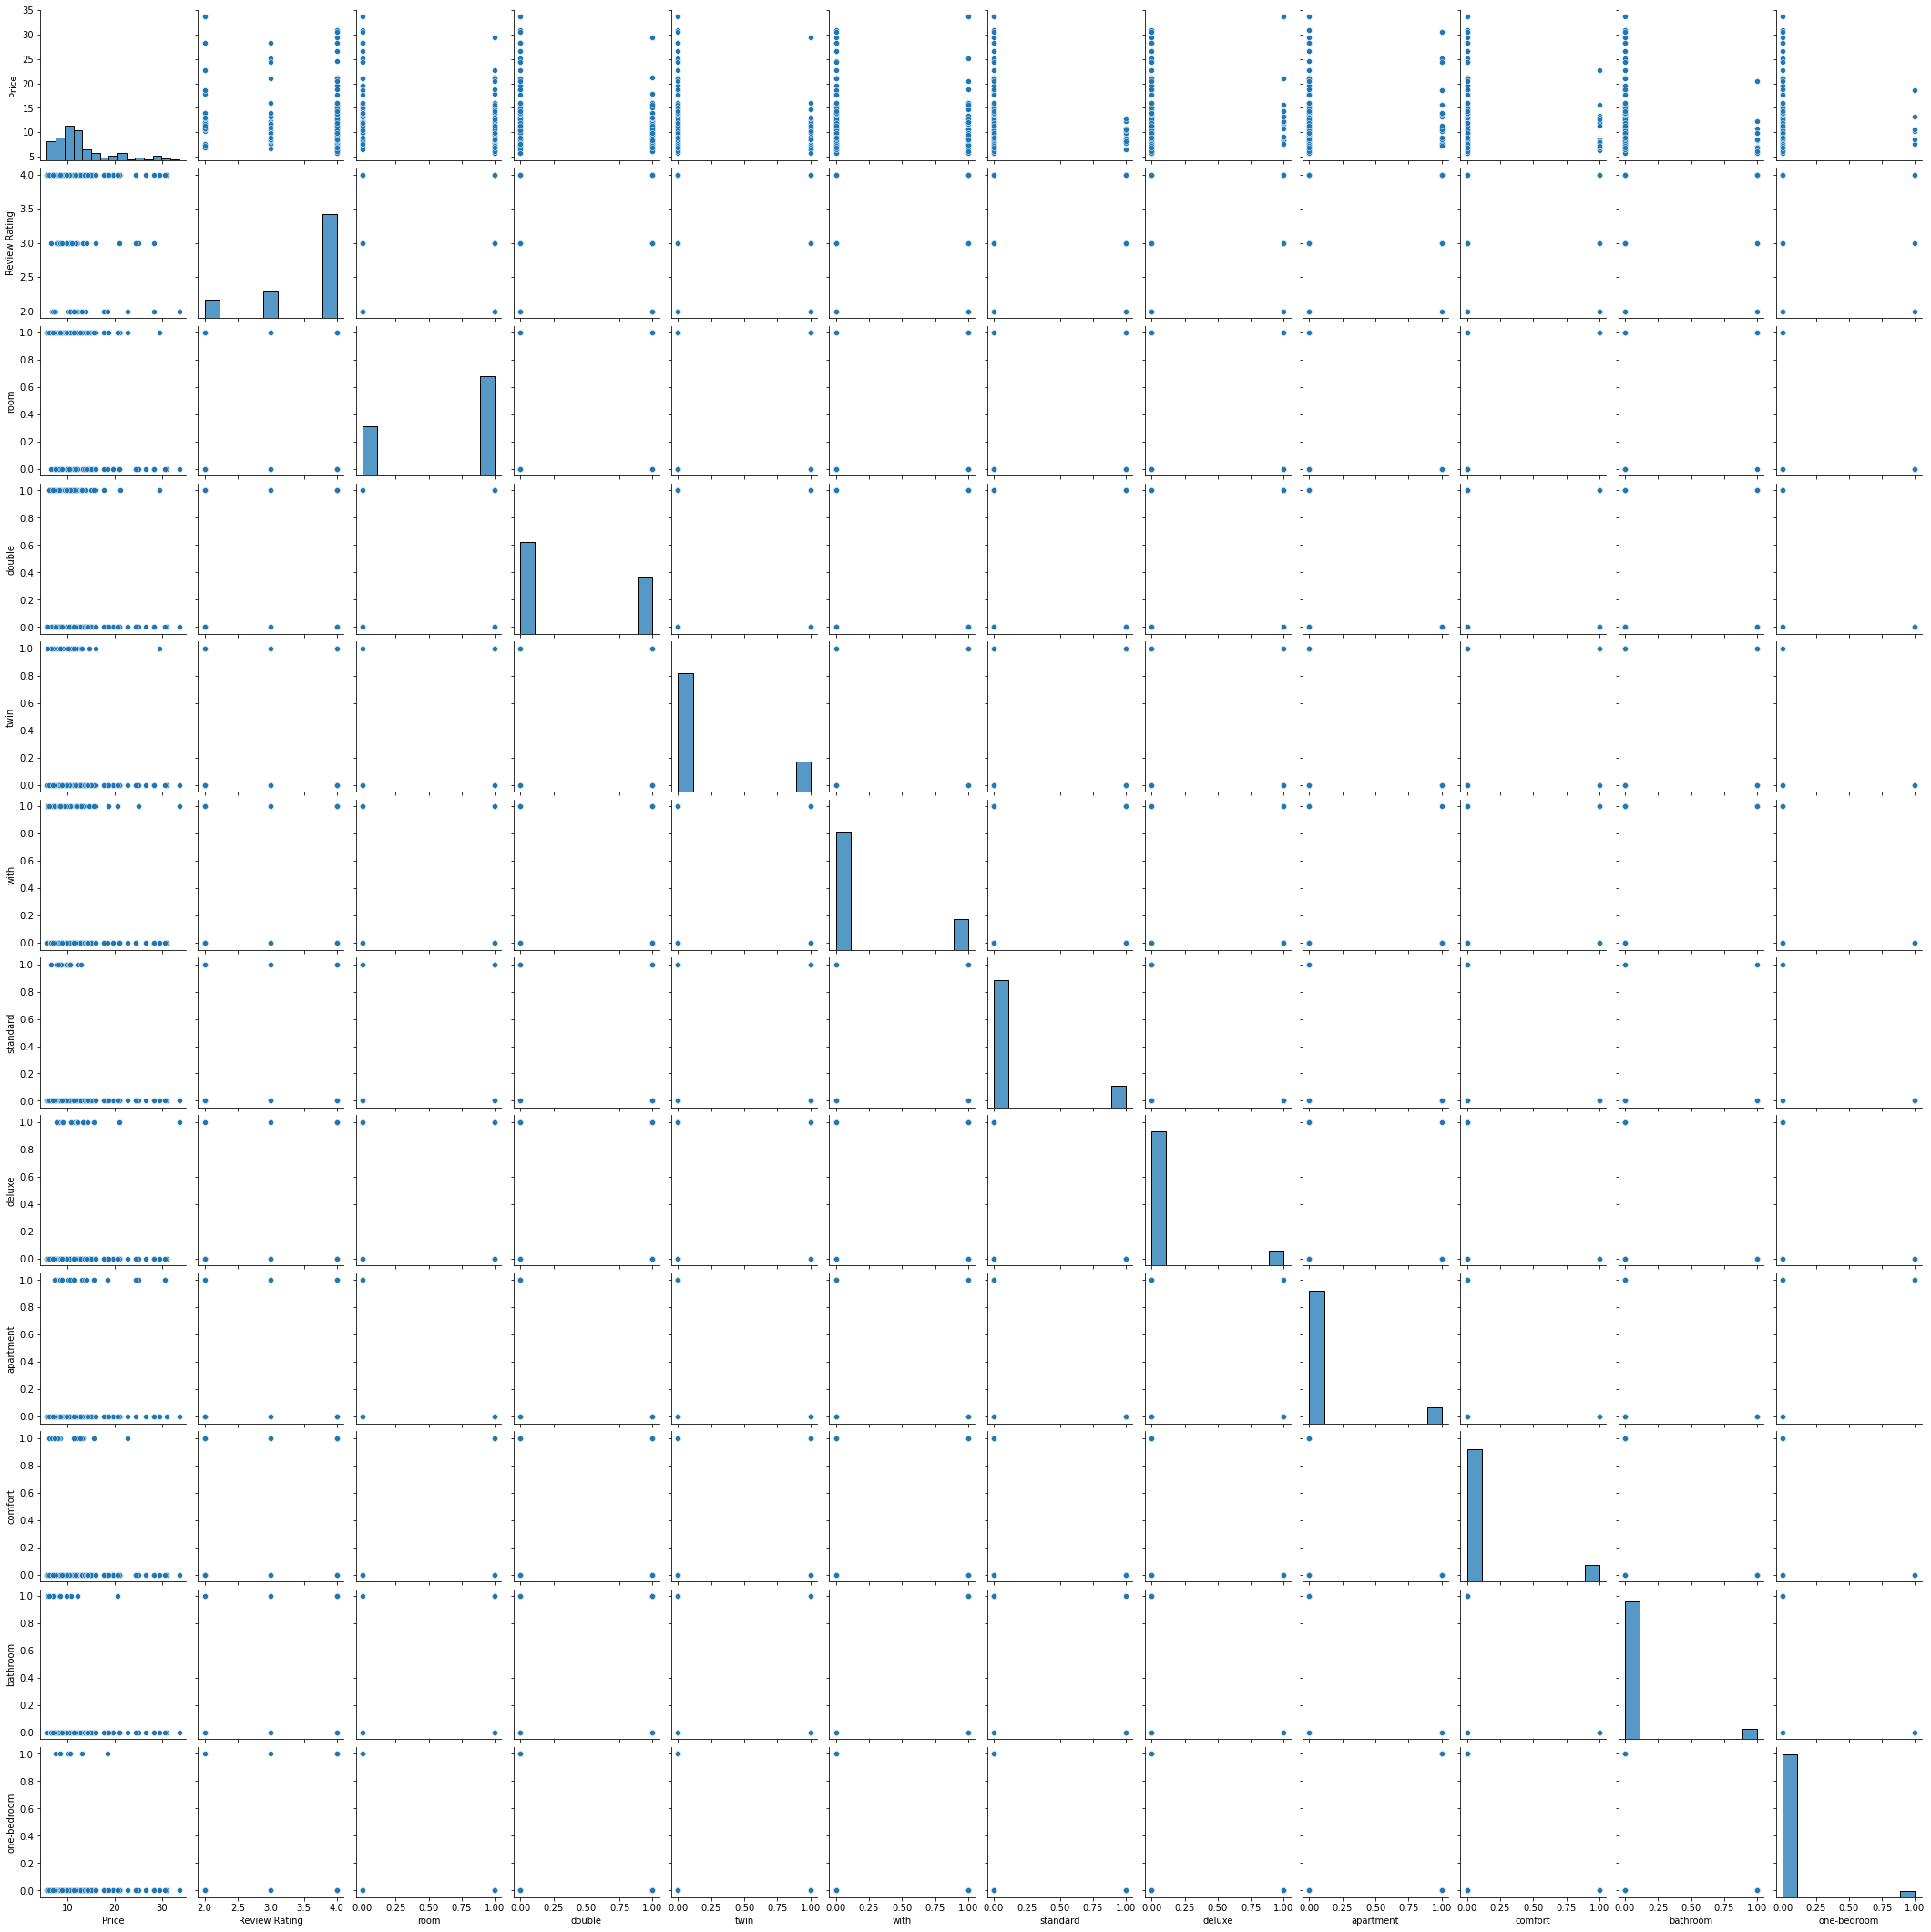

In [39]:
sns.pairplot(data=df)

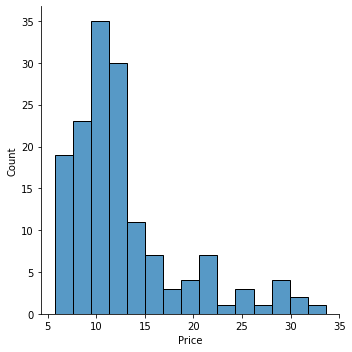

In [40]:
sns.displot(df['Price'],kde=False)

In [41]:
df

,Hotel Name,Price,Review Rating,Review text,Date of Review,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
3,Rhodes Hotel,12.854,4,Nice stay,06-02-2012,1,1,1,1,0,0,0,0,0,0
11,"Mandarin Oriental Hyde Park, London",29.391,4,"Good hotel, but needs touch-up and improved la...",2/17/2014,1,1,1,0,0,0,0,0,0,0
12,The Savoy,17.798,2,what a disappointment,06-05-2016,1,1,0,0,0,0,0,0,0,0
13,The Dorchester,11.336,4,Great hotel needs to up its game to compete today,01-04-2017,1,0,0,0,0,0,0,0,0,0
20,The Dorchester,6.794,2,The brand is bigger than the experience,10-03-2013,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,The Savoy,11.430,2,Why do pompous?,12/18/2014,1,0,1,0,0,0,0,1,0,0
516,A To Z Hotel,7.266,2,"Filthy, Unhygienic",2/16/2016,1,1,0,0,0,0,0,1,0,0
520,The Rembrandt,8.899,3,Great location,08-08-2011,0,0,0,0,0,0,1,0,0,0
522,Apex London Wall Hotel,6.123,4,Excellent!,1/30/2012,1,1,0,1,0,0,0,0,1,0


In [42]:
df=df.drop(['Hotel Name','Review text'],axis=1)
df

,Price,Review Rating,Date of Review,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
3,12.854,4,06-02-2012,1,1,1,1,0,0,0,0,0,0
11,29.391,4,2/17/2014,1,1,1,0,0,0,0,0,0,0
12,17.798,2,06-05-2016,1,1,0,0,0,0,0,0,0,0
13,11.336,4,01-04-2017,1,0,0,0,0,0,0,0,0,0
20,6.794,2,10-03-2013,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,11.430,2,12/18/2014,1,0,1,0,0,0,0,1,0,0
516,7.266,2,2/16/2016,1,1,0,0,0,0,0,1,0,0
520,8.899,3,08-08-2011,0,0,0,0,0,0,1,0,0,0
522,6.123,4,1/30/2012,1,1,0,1,0,0,0,0,1,0


In [45]:
cols=df.drop(['Date of Review'],axis=1)
cols

,Price,Review Rating,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
3,12.854,4,1,1,1,1,0,0,0,0,0,0
11,29.391,4,1,1,1,0,0,0,0,0,0,0
12,17.798,2,1,1,0,0,0,0,0,0,0,0
13,11.336,4,1,0,0,0,0,0,0,0,0,0
20,6.794,2,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,11.430,2,1,0,1,0,0,0,0,1,0,0
516,7.266,2,1,1,0,0,0,0,0,1,0,0
520,8.899,3,0,0,0,0,0,0,1,0,0,0
522,6.123,4,1,1,0,1,0,0,0,0,1,0


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1=df[['Price','Review Rating',]].apply(LabelEncoder().fit_transform)
df1

,Price,Review Rating
3,85,2
11,121,2
12,107,0
13,68,2
20,7,0
...,...,...
513,70,0
516,13,0
520,37,1
522,2,2


In [47]:
df=pd.concat([df1,cols],axis=1)
df

,Price,Review Rating,Price,Review Rating,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
3,85,2,12.854,4,1,1,1,1,0,0,0,0,0,0
11,121,2,29.391,4,1,1,1,0,0,0,0,0,0,0
12,107,0,17.798,2,1,1,0,0,0,0,0,0,0,0
13,68,2,11.336,4,1,0,0,0,0,0,0,0,0,0
20,7,0,6.794,2,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,70,0,11.430,2,1,0,1,0,0,0,0,1,0,0
516,13,0,7.266,2,1,1,0,0,0,0,0,1,0,0
520,37,1,8.899,3,0,0,0,0,0,0,1,0,0,0
522,2,2,6.123,4,1,1,0,1,0,0,0,0,1,0


In [48]:
df

,Price,Review Rating,Price,Review Rating,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
3,85,2,12.854,4,1,1,1,1,0,0,0,0,0,0
11,121,2,29.391,4,1,1,1,0,0,0,0,0,0,0
12,107,0,17.798,2,1,1,0,0,0,0,0,0,0,0
13,68,2,11.336,4,1,0,0,0,0,0,0,0,0,0
20,7,0,6.794,2,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,70,0,11.430,2,1,0,1,0,0,0,0,1,0,0
516,13,0,7.266,2,1,1,0,0,0,0,0,1,0,0
520,37,1,8.899,3,0,0,0,0,0,0,1,0,0,0
522,2,2,6.123,4,1,1,0,1,0,0,0,0,1,0


In [49]:
df.corr()

,Price,Review Rating,Price,Review Rating,room,double,twin,with,standard,deluxe,apartment,comfort,bathroom,one-bedroom
Price,1.000000,-0.055147,0.872207,-0.055147,-0.329448,-0.243846,-0.113487,-0.061950,-0.187972,0.087586,0.064263,-0.105915,-0.225209,-0.033511
Review Rating,-0.055147,1.000000,-0.075843,1.000000,0.009519,-0.019957,0.008010,0.101055,-0.067372,0.045765,-0.033963,-0.198627,0.026576,-0.020068
Price,0.872207,-0.075843,1.000000,-0.075843,-0.410095,-0.261779,-0.149315,-0.049996,-0.200208,0.050749,0.090059,-0.112182,-0.162660,-0.045338
Review Rating,-0.055147,1.000000,-0.075843,1.000000,0.009519,-0.019957,0.008010,0.101055,-0.067372,0.045765,-0.033963,-0.198627,0.026576,-0.020068
room,-0.329448,0.009519,-0.410095,0.009519,1.000000,0.497781,0.183421,0.218260,0.051245,-0.001558,-0.489293,0.250609,0.143076,-0.289113
double,-0.243846,-0.019957,-0.261779,-0.019957,0.497781,1.000000,-0.199131,0.104253,0.098401,0.010853,-0.271873,-0.065899,0.092986,-0.160644
twin,-0.113487,0.008010,-0.149315,0.008010,0.183421,-0.199131,1.000000,0.025806,0.068940,-0.059170,-0.174978,0.233937,0.109881,-0.103391
with,-0.061950,0.101055,-0.049996,0.101055,0.218260,0.104253,0.025806,1.000000,-0.070479,0.105272,-0.121708,-0.025420,0.551496,-0.103391
standard,-0.187972,-0.067372,-0.200208,-0.067372,0.051245,0.098401,0.068940,-0.070479,1.000000,-0.137149,-0.142171,-0.147092,-0.043529,-0.084006
deluxe,0.087586,0.045765,0.050749,0.045765,-0.001558,0.010853,-0.059170,0.105272,-0.137149,1.000000,-0.042398,-0.118290,-0.093091,-0.067557


<AxesSubplot:>

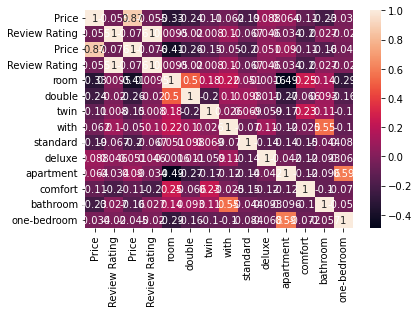

In [54]:
sns.heatmap(df.corr(),annot=True)

In [55]:
x=df.iloc[:,:7]
y=df.iloc[:,7:8]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [56]:
model_1=LinearRegression()
model_1.fit(x_train,y_train)


LinearRegression()

In [57]:
model_1.coef_

array([[-0.00135068,  0.02966505,  0.0119802 ,  0.02966505,  0.19818291,
         0.00048679,  0.07173584]])

In [58]:
##predicting test data

pred=model_1.predict(x_test)
pred

array([[ 0.05536123],
       [ 0.28060136],
       [ 0.32148048],
       [ 0.00990848],
       [ 0.25035432],
       [ 0.26790828],
       [-0.02985533],
       [ 0.27916707],
       [ 0.26890536],
       [ 0.47173259],
       [ 0.24932474],
       [ 0.20273335],
       [ 0.26943558],
       [ 0.27722366],
       [ 0.05540358],
       [ 0.22369672],
       [ 0.26858559],
       [ 0.26982096],
       [ 0.14642729],
       [ 0.33948625],
       [ 0.00995569],
       [ 0.2510238 ],
       [ 0.26837611],
       [ 0.21665238],
       [ 0.08074799],
       [ 0.33878902],
       [ 0.35205715],
       [ 0.26643964],
       [ 0.27824778],
       [ 0.26828856],
       [ 0.28951091],
       [ 0.26790828],
       [ 0.26326376],
       [ 0.13704478],
       [ 0.14805074],
       [ 0.14059496],
       [ 0.19740208],
       [ 0.09441433],
       [ 0.05036169],
       [ 0.27645147],
       [ 0.08151271],
       [ 0.06929575],
       [ 0.14185407],
       [ 0.09881449],
       [ 0.13029625],
       [-0

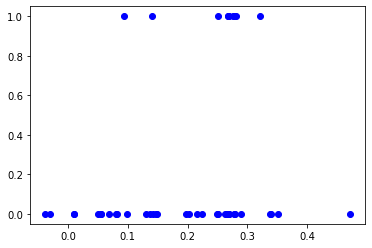

In [59]:
plt.scatter(pred,y_test,color='blue')
plt.show()


# confusion matrix

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cutoff = 0.7

y_pred_classes = np. zeros_like(pred)
y_pred_classes [pred>cutoff] = 1
y_test_classes = np. zeros_like(pred) 
y_test_classes [y_test > cutoff] = 1

# Now run the confusion matrix as before:

confusion_matrix(y_test_classes, y_pred_classes)

array([[36,  0],
       [10,  0]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test_classes, y_pred_classes))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        36
         1.0       0.00      0.00      0.00        10

    accuracy                           0.78        46
   macro avg       0.39      0.50      0.44        46
weighted avg       0.61      0.78      0.69        46



C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91961\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
tn, fp,fn,tp=confusion_matrix(y_test_classes, y_pred_classes).ravel()

In [68]:
 2 * (precision * recall) / (precision + recall)

nan

In [69]:
## auc_roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_classes, y_pred_classes)
roc_auc = auc(fpr, tpr)
roc_auc

0.5

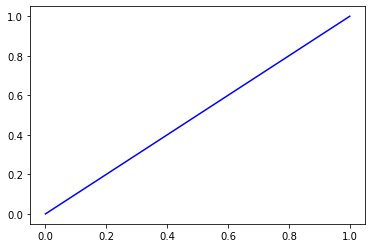

In [71]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue')
plt.show()